In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Get the data
In this notebook we face a regression problem: predicting the cost of a house in California. The dataset used is the `california_housing`, it consists of 20640 records with 8 numerical features:
```
features_name = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                 'Population', 'AveOccup', 'Latitude', 'Longitude']
```

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
x_full, y_full = fetch_california_housing(return_X_y=True)
y_full = y_full.reshape((-1,1))
print(x_full.shape, y_full.shape)
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full)
x_train, x_val,  y_train, y_val  = train_test_split(x_train, y_train)

(20640, 8) (20640, 1)


In [4]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train, x_test, x_val = [scaler.transform(x_) for x_ in (x_train, x_test, x_val)]

# Wide and Deep
The following is a simplified version. The original one (described in [this paper](https://arxiv.org/pdf/1606.07792.pdf)) was designed for regression and classification problems with sparse inputs, in particular for recommender systems. The idea is to achieve both memorization (learning of the correlation available in the historical data) and generalization (exploring new feature combinations that have never or rarely occurred in the past) by combining together wide and deep models.
### Define the model

In [10]:
from tensorflow.keras.layers import Input, Dense, Concatenate

inputs  = Input(shape=[x_train.shape[1]])
hidden1 = Dense(20, activation="relu")(inputs)
hidden2 = Dense(10, activation="relu")(hidden1)
hidden3 = Dense(10, activation="relu")(hidden2)
concat  = Concatenate()([hidden1, hidden3])
outputs = Dense(1, activation=None)(concat)

wide_dp = tf.keras.Model(inputs=[inputs], outputs=outputs)

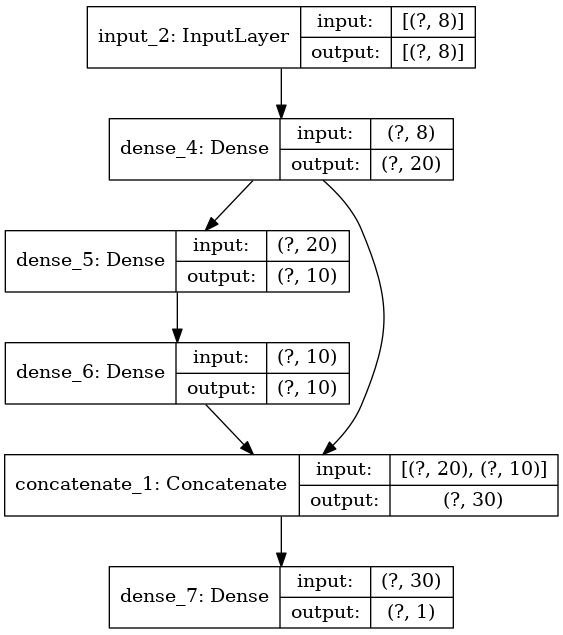

In [11]:
tf.keras.utils.plot_model(wide_dp, show_shapes=True)

### Training

In [7]:
wide_dp.compile(loss='mse', optimizer='sgd')
history = wide_dp.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8567 - val_loss: 0.5923
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5324 - val_loss: 0.4904
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - val_loss: 0.4588
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4381 - val_loss: 0.4425
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4232 - val_loss: 0.4261
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4062 - val_loss: 0.4293
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 0.4252
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3936 - val_loss: 0.4065
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3858 - val_loss: 0.3990
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3796 - val_loss: 0.3958

Text(0.5, 0, 'Epoch')

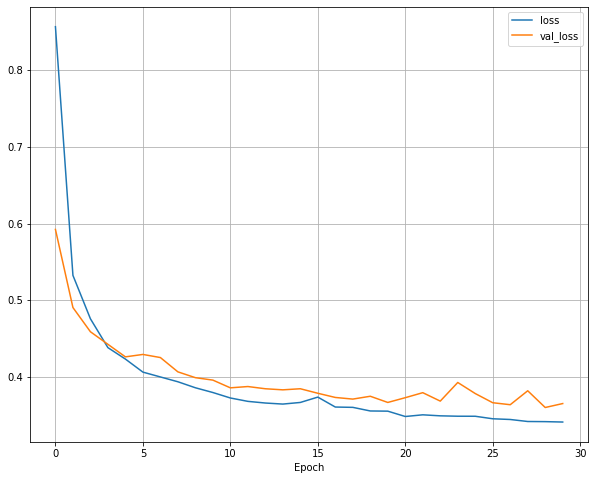

In [8]:
plt.figure(figsize=(10,8))
for k, v in history.history.items():
    plt.plot(v, label=k)
plt.legend()
plt.grid()
plt.xlabel('Epoch')

### Evaluation

In [9]:
test_loss = wide_dp.evaluate(x_test, y_test)
print("Test loss    : %.3f"%test_loss)

162/162 [==============================] - 0s 1ms/step - loss: 0.3719
Test loss    : 0.372


# Multiple Inputs
Suppose to have better insights into the data and to know that some features present simple patterns while other need more complex transformations. We can split the inputs and create two different paths.

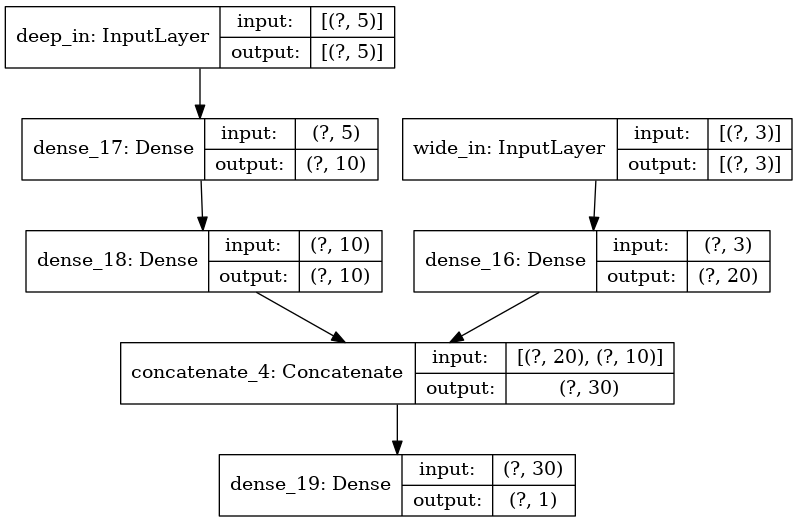

In [14]:
from tensorflow.keras.layers import Input, Dense, Concatenate

wide_feats = 3

inputs_w = Input(shape=[wide_feats], name='wide_in')
inputs_d = Input(shape=[x_train.shape[1] - wide_feats], name='deep_in')
hidden1 = Dense(20, activation="relu")(inputs_w)
hidden2 = Dense(10, activation="relu")(inputs_d)
hidden3 = Dense(10, activation="relu")(hidden2)
concat  = Concatenate()([hidden1, hidden3])
outputs = Dense(1, activation=None)(concat)

multi_input = tf.keras.Model(inputs=[inputs_w, inputs_d], outputs=outputs)
tf.keras.utils.plot_model(multi_input, show_shapes=True)

In [15]:
multi_input.compile(loss='mse', optimizer='sgd')
history = multi_input.fit(x={'wide_in': x_train[:,:wide_feats], 'deep_in': x_train[:,wide_feats:]},
                          y=y_train,
                          epochs=30,
                          validation_data=((x_val[:,:wide_feats], x_val[:,wide_feats:]), y_val))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.0146 - val_loss: 0.6395
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5955 - val_loss: 0.5828
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5536 - val_loss: 0.5440
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5149 - val_loss: 0.5087
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4859 - val_loss: 0.4859
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4652 - val_loss: 0.4736
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4531 - val_loss: 0.4661
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4432 - val_loss: 0.4524
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.4517
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4301 - val_loss: 0.4438

Text(0.5, 0, 'Epoch')

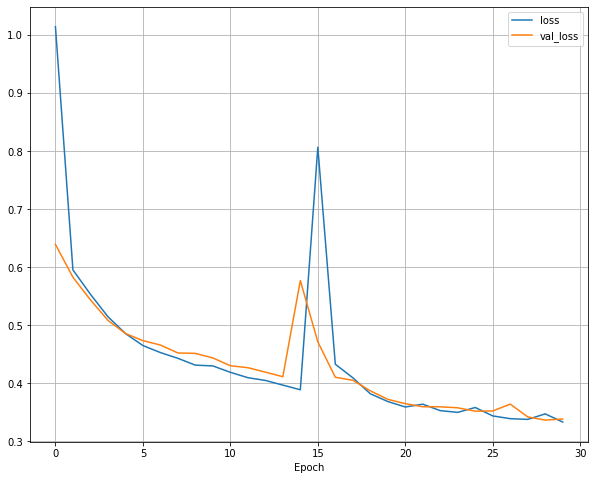

In [16]:
plt.figure(figsize=(10,8))
for k, v in history.history.items():
    plt.plot(v, label=k)
plt.legend()
plt.grid()
plt.xlabel('Epoch')

### Evaluation

In [17]:
test_loss = multi_input.evaluate({'wide_in':x_test[:,:wide_feats], 'deep_in':x_test[:,wide_feats:]}, y_test)
print("Test loss    : %.3f"%test_loss)

162/162 [==============================] - 0s 1ms/step - loss: 0.3387
Test loss    : 0.339


### Predictions

In [20]:
multi_input({'deep_in':x_val[:,wide_feats:], 'wide_in':x_val[:,:wide_feats]})

<tf.Tensor: shape=(3870, 1), dtype=float32, numpy=
array([[2.2652988 ],
       [2.6262348 ],
       [2.6826677 ],
       ...,
       [0.83594316],
       [1.3872873 ],
       [1.1230141 ]], dtype=float32)>